In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df=pd.read_excel('loan_approval.xlsx')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.shape

(614, 13)

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
dfinfo=pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
 df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
y=df['Loan_Status']
x=df.drop(['Loan_ID','Loan_Status','Gender'],axis=1)

In [16]:
x.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [17]:
x.isna().sum()

Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [18]:
x['Dependents'].unique()

array([0, 1, 2, '3+', nan], dtype=object)

In [19]:
x['Married'].fillna(value=x['Married'].mode()[0],inplace=True)
x["Dependents"].replace({'3+':3}, inplace=True)
x['Dependents'].fillna(value=x['Dependents'].mean(),inplace=True)
x['Self_Employed'].fillna(value=x['Self_Employed'].mode()[0],inplace=True)
x['LoanAmount'].fillna(value=x['LoanAmount'].mean(),inplace=True)
x['Loan_Amount_Term'].fillna(value=x['Loan_Amount_Term'].mean(),inplace=True)
x['Credit_History'].fillna(value=x['Credit_History'].mean(),inplace=True)

In [20]:
x.isna().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [21]:
y.isna().sum()

0

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()

In [24]:
y=le.fit_transform(y)
x['Education']=le.fit_transform(x['Education'])
x['Married']=le.fit_transform(x['Married'])
x['Self_Employed']=le.fit_transform(x['Self_Employed'])
x['Property_Area']=le.fit_transform(x['Property_Area'])

In [25]:
x.shape

(614, 10)

<Axes: >

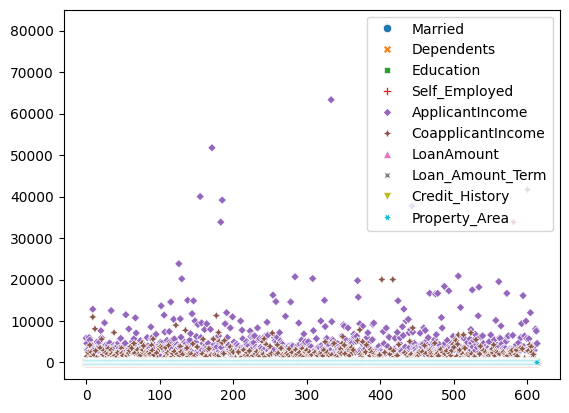

In [26]:
sns.scatterplot(x)

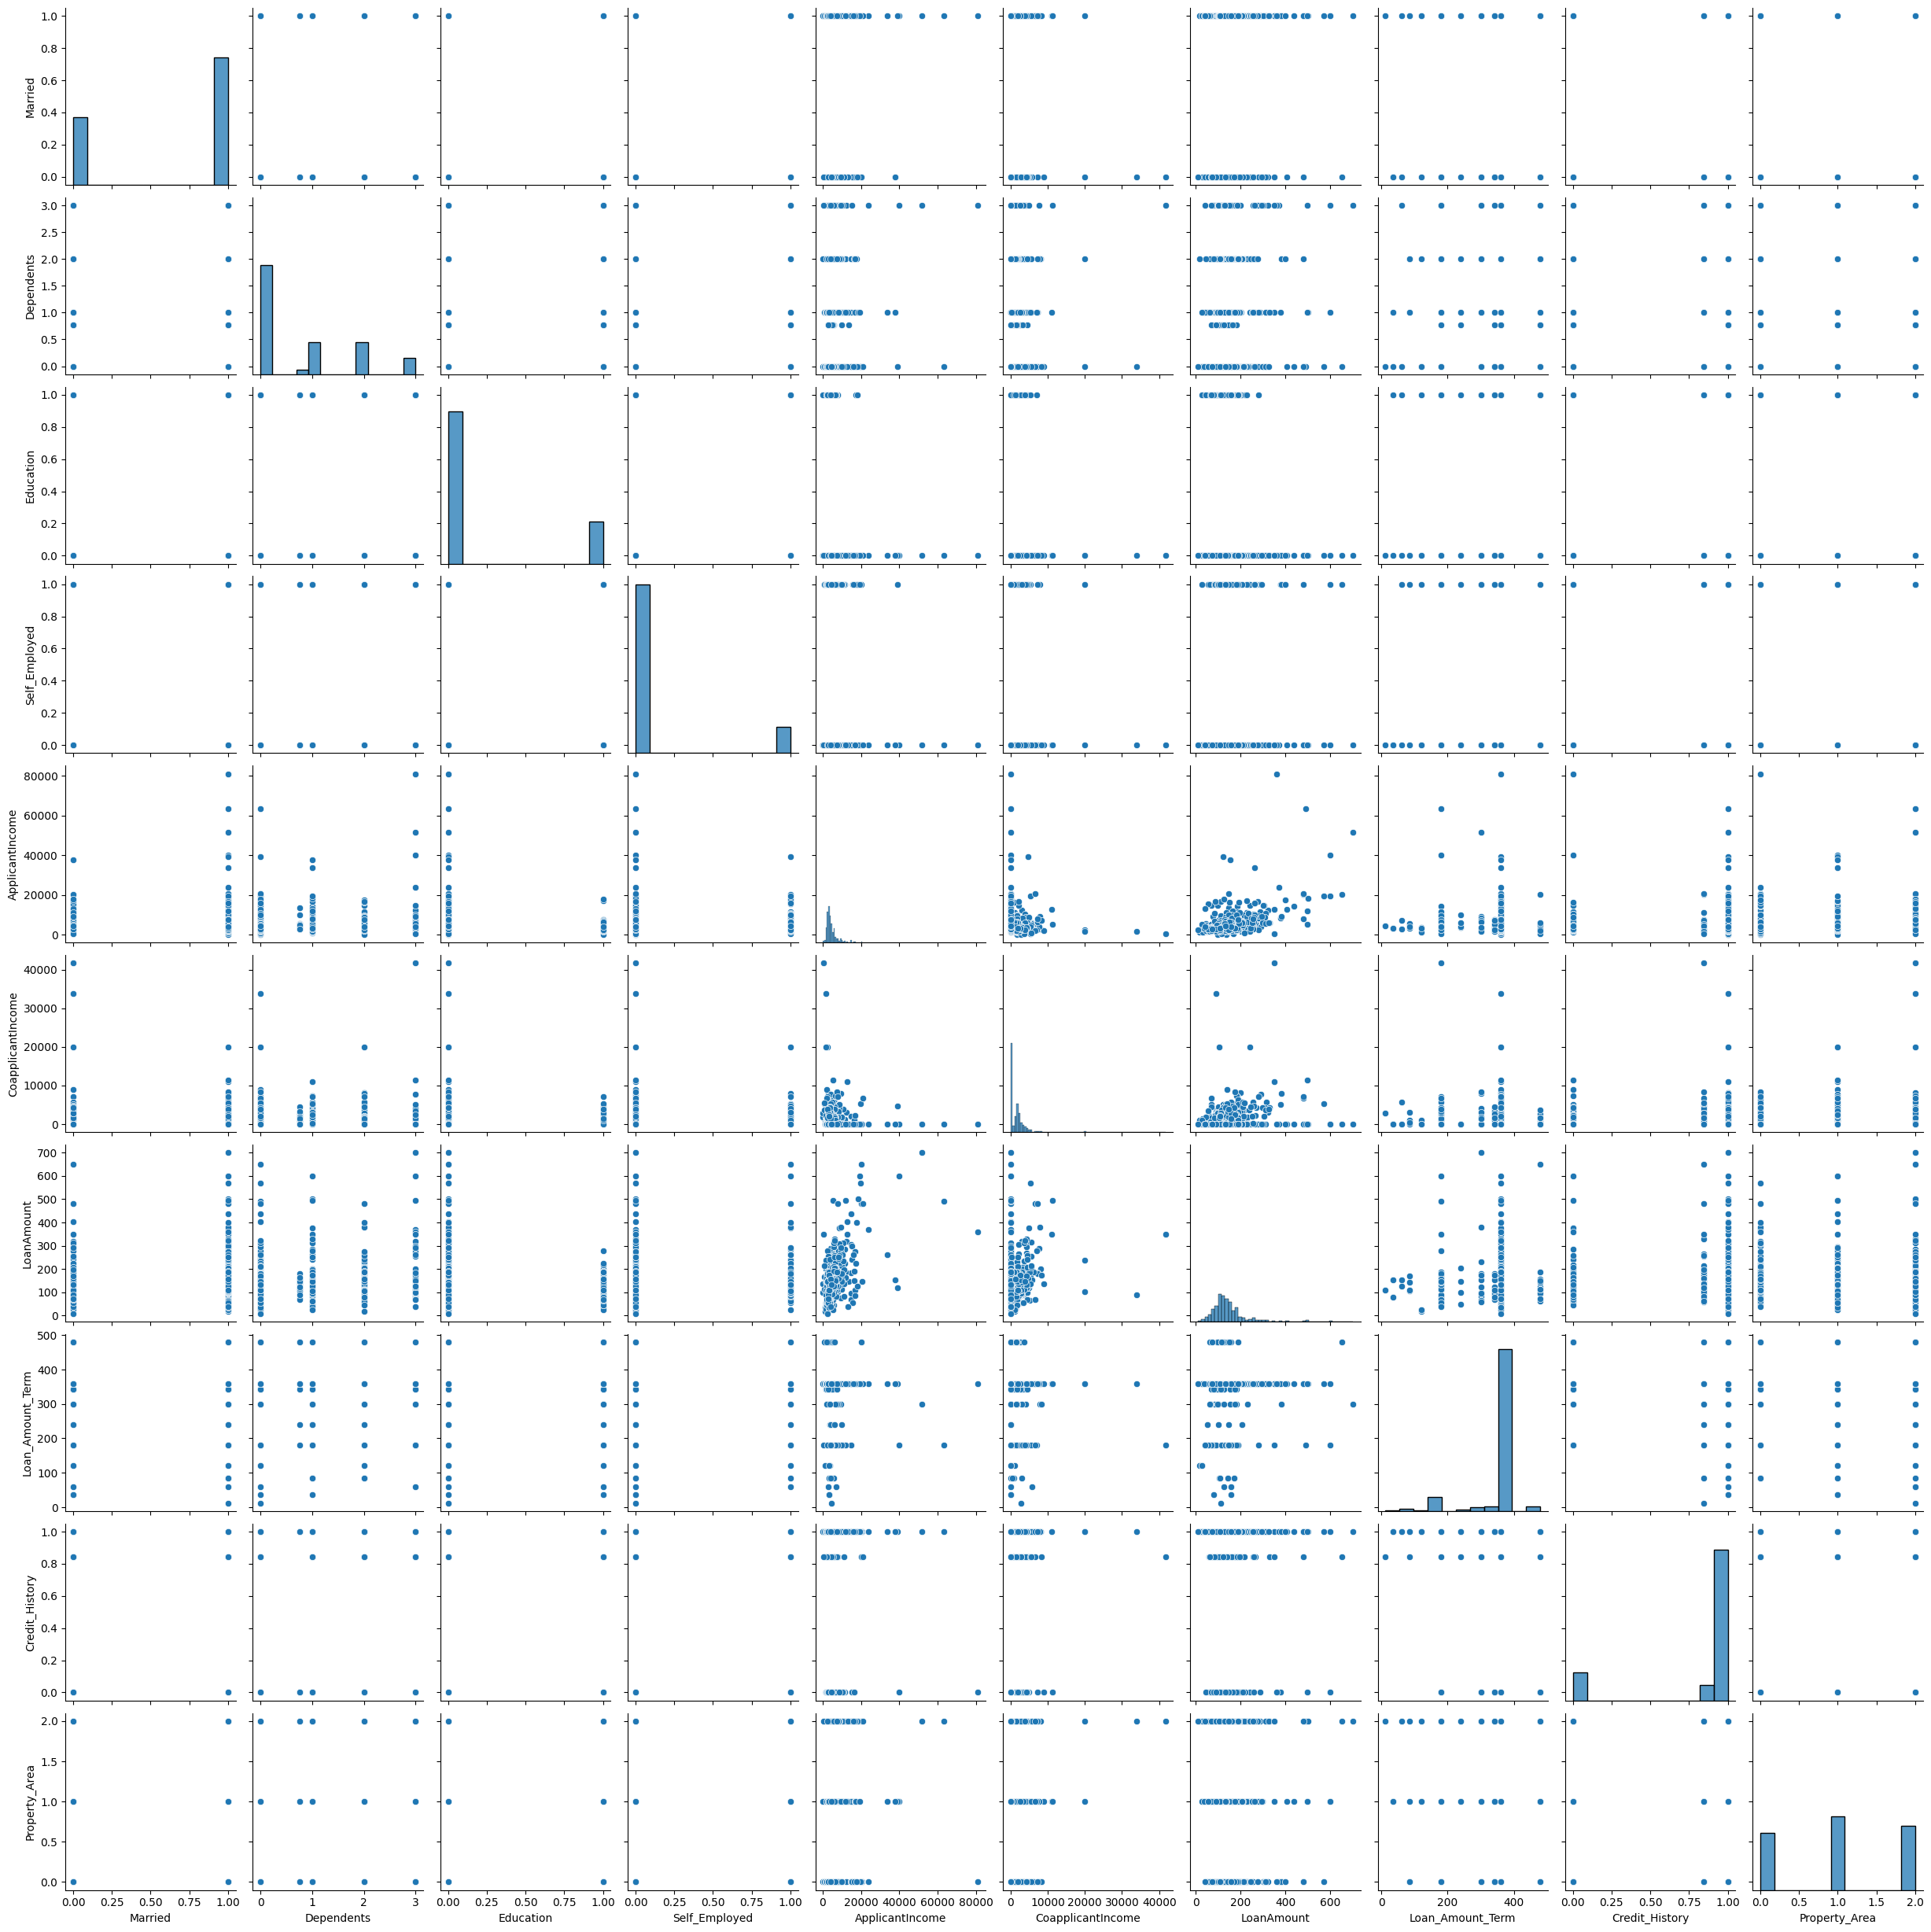

In [27]:
sns.pairplot(x)

In [28]:
x.corr()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Married,1.000000,0.339653,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257
Dependents,0.339653,1.000000,0.058317,0.057177,0.118358,0.027171,0.160767,-0.098048,-0.046995,0.006750
Education,0.012304,0.058317,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243
Self_Employed,0.004489,0.057177,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860
ApplicantIncome,0.051708,0.118358,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500
CoapplicantIncome,0.075948,0.027171,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522
LoanAmount,0.147141,0.160767,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776
Loan_Amount_Term,-0.100863,-0.098048,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620
Credit_History,0.005852,-0.046995,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880
Property_Area,0.004257,0.006750,-0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,-0.001880,1.000000


<Axes: >

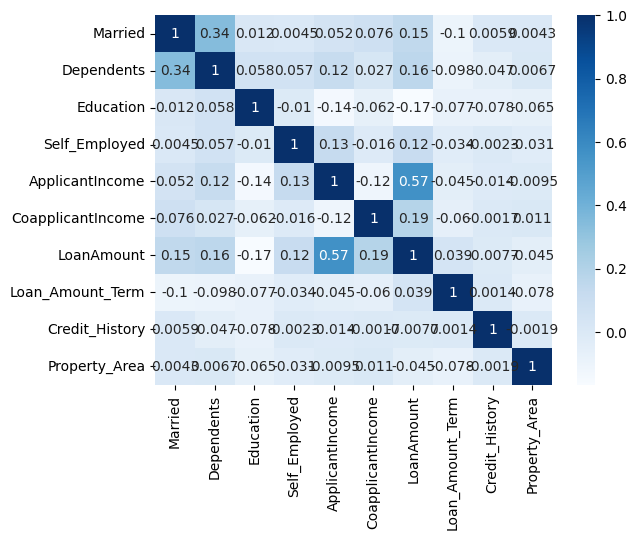

In [29]:
sns.heatmap(x.corr(),cmap='Blues',annot=True)

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123, stratify=y)

In [32]:
x_train.shape

(429, 10)

In [33]:
y_train.shape

(429,)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression(random_state=42)

In [36]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [37]:
y_pred=lr.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
confusion_matrix(y_test,y_pred)

array([[ 22,  36],
       [  0, 127]])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        58
           1       0.78      1.00      0.88       127

    accuracy                           0.81       185
   macro avg       0.89      0.69      0.71       185
weighted avg       0.85      0.81      0.77       185



In [41]:
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

80.54054054054053

In [42]:
from sklearn.model_selection import GridSearchCV,ParameterGrid

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [46]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
yt_pred= rf.predict(x_test)

In [48]:
print(classification_report(yt_pred,y_test))

              precision    recall  f1-score   support

           0       0.40      0.85      0.54        27
           1       0.97      0.78      0.86       158

    accuracy                           0.79       185
   macro avg       0.68      0.82      0.70       185
weighted avg       0.89      0.79      0.82       185



In [49]:
pip install xgboost

In [50]:
import xgboost as xgb

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

dtrain = xgb.DMatrix(x_train, label=y_train)

model = xgb.train(params, dtrain)


dtest = xgb.DMatrix(x_test)
predictions = model.predict(dtest)

accuracy = accuracy_score(y_test, predictions.round())
print("Accuracy:", accuracy)


Accuracy: 0.7783783783783784


In [51]:
rf=RandomForestClassifier()

In [52]:
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),x,y,cv=5, scoring= 'accuracy'))

0.7899240303878449

In [53]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_feature = [0.2,0.6,1.0]

# Maximum nummber of levels in tree
Max_depth = [2,8,None]

# Number of sample
Max_sample = [0.5,0.75,1.0]

In [54]:
param_grids={
    "n_estimators":n_estimators,
    'max_features':max_feature,
    "max_depth":Max_depth,
    "max_samples":Max_sample
}

In [55]:
param_gridlr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type (L1 or L2 regularization)
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}


In [56]:
rf_grid= GridSearchCV( estimator= rf, param_grid= param_grids, cv=5, verbose=2, n_jobs=-1)

In [57]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [58]:
rf_grid.best_params_

{'max_depth': 2, 'max_features': 0.6, 'max_samples': 0.5, 'n_estimators': 20}

In [59]:
rf_grid.best_score_

0.8135978112175103

In [60]:
lr_grid= GridSearchCV( estimator= lr, param_grid= param_gridlr, cv=5, verbose=2, n_jobs=-1)

In [61]:
lr_grid.fit(x_train,y_train
           )

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [62]:
lr_grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [63]:
lr_grid.best_score_

0.8159233926128591